<a href="https://colab.research.google.com/github/rushika17/rushika17/blob/main/RUSHIKA_DACNN_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
#import tensorflow_datasets as tfds
import numpy as np
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage import io
import zipfile

In [ ]:
#https://www.gcptutorials.com/post/load-mnist-data-with-tensorflow-datsets
# train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', shuffle_files=True)
# val_dataset,val_info = tfds.load('horses_or_humans', with_info = True, split='test', shuffle_files=True)

In [ ]:
# train_dataset = train_dataset.take(300)
# val_dataset = val_dataset.take(60)

In [ ]:
#Getting data from location
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip

--2022-12-01 20:33:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M  25.2MB/s    in 6.6s    

2022-12-01 20:33:17 (21.5 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]

--2022-12-01 20:33:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data which we got is in zip format. so, we are doing UNZIP.
local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')
local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

In [ ]:
Train_Horses = r'/content/horse-or-human/horses/'
Train_Humans = r'/content/horse-or-human/humans/'
Validation_Horses = r'/content/validation-horse-or-human/horses/'
Validation_Humans = r'/content/validation-horse-or-human/humans/'


In [ ]:
#https://pynative.com/python-count-number-of-files-in-a-directory/
Train_Horses_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/horse-or-human/horses'):
    Train_Horses_Images += len(Images)
print('Training Images Horses:', Train_Horses_Images)

Training Images Horses: 500


In [ ]:
#https://pynative.com/python-count-number-of-files-in-a-directory/
Train_Humans_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/horse-or-human/humans'):
    Train_Humans_Images += len(Images)
print('Training Images Humans:', Train_Humans_Images)

Training Images Humans: 527


In [ ]:
#https://pynative.com/python-count-number-of-files-in-a-directory/
Validation_Horses_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/validation-horse-or-human/horses'):
    Validation_Horses_Images += len(Images)
print('Validation Images Horse:', Validation_Horses_Images)

Validation Images Horse: 128


In [ ]:
#https://pynative.com/python-count-number-of-files-in-a-directory/
Validation_Humans_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/validation-horse-or-human/humans'):
    Validation_Humans_Images += len(Images)
print('Validation Images Human:', Validation_Humans_Images)

Validation Images Human: 128


In [ ]:
Horses_Train_Images = []
Humans_Train_Images = []
Horses_Test_Images = []
Humans_Test_Images = []

Horses_Train_Images_Path = os.listdir(Train_Horses)
Humans_Train_Images_Path = os.listdir(Train_Humans)
Horses_Validation_Images_Path = os.listdir(Validation_Horses)
Humans_Validation_Images_Path = os.listdir(Validation_Humans)

for i, name_image in enumerate(Horses_Train_Images_Path):    
    if (name_image.split('.')[1] == 'png'):        
        pic = io.imread(Train_Horses + name_image)        
        pic = Image.fromarray(pic)        
        pic = pic.resize((224,224)) 
        Horses_Train_Images.append(np.array(pic))


for i, name_image in enumerate(Humans_Train_Images_Path):    
    if (name_image.split('.')[1] == 'png'):        
        pic = io.imread(Train_Humans + name_image)        
        pic = Image.fromarray(pic)        
        pic = pic.resize((224,224)) 
        Humans_Train_Images.append(np.array(pic))

for i, name_image in enumerate(Horses_Validation_Images_Path):    
    if (name_image.split('.')[1] == 'png'):        
        pic = io.imread(Validation_Horses + name_image)        
        pic = Image.fromarray(pic)        
        pic = pic.resize((224,224)) 
        Horses_Test_Images.append(np.array(pic))

for i, name_image in enumerate(Humans_Validation_Images_Path):    
    if (name_image.split('.')[1] == 'png'):        
        pic = io.imread(Validation_Humans + name_image)        
        pic = Image.fromarray(pic)        
        pic = pic.resize((224,224)) 
        Humans_Test_Images.append(np.array(pic))


Horses_Train_Images_Array = np.array(Horses_Train_Images)
Humans_Train_Images_Array = np.array(Humans_Train_Images)
Horses_Test_Images_Array = np.array(Horses_Test_Images)
Humans_Test_Images_Array = np.array(Humans_Test_Images)

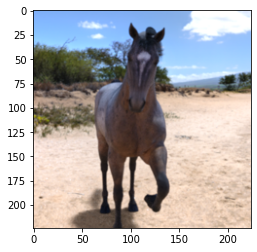

In [ ]:
#Showing up random images in Training horse images 
plt.imshow(Horses_Train_Images_Array[100])

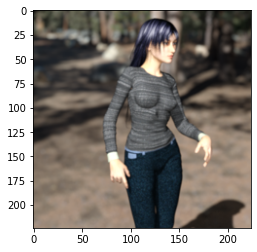

In [ ]:
#Showing up random images in Training horse images 
plt.imshow(Humans_Train_Images_Array[25])

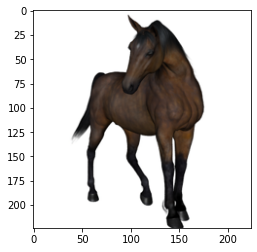

In [ ]:
plt.imshow(Horses_Test_Images_Array[0])

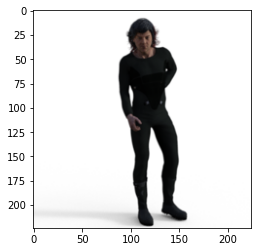

In [ ]:
plt.imshow(Humans_Test_Images_Array[50])

**Data set Size Before Augmentation**

In [ ]:
print("Horses Train Images Array:",len(Horses_Train_Images_Array))
print("Humans Train Images Array:",len(Humans_Train_Images_Array))
print("Horses Test Images Array:",len(Horses_Test_Images_Array))
print("Humans Test Images Array:",len(Humans_Test_Images_Array))

Horses Train Images Array: 500
Humans Train Images Array: 527
Horses Test Images Array: 128
Humans Test Images Array: 128


**Augmentation Techniques applied to Dataset**

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/06/offline-data-augmentation-for-multiple-images/
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

**Making New folder to Store the Train Horses Augmented Images**

In [ ]:
#https://stackoverflow.com/questions/65926475/how-to-create-a-folder-in-my-google-drive-through-google-colab-code
import os

#creating new folder to store the augmented images 
os.makedirs('/content/New_Train_Horses')

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/06/offline-data-augmentation-for-multiple-images/
i = 0
for batch in train_datagen.flow(Horses_Train_Images_Array, batch_size=128,
                          save_to_dir= r'/content/New_Train_Horses',
                          save_prefix='Horsesnew',
                          save_format='png'):    
    i += 1    
    if i > 128:        
        break

**After Augmentation Train Horses Images Count**

In [ ]:
Augmented_Train_Horses_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/New_Train_Horses'):
    Augmented_Train_Horses_Images += len(Images)
print('Augmented Training Images Horses:', Augmented_Train_Horses_Images)

Augmented Training Images Horses: 16111


In [ ]:
os.makedirs('/content/New_Test_Horses')

In [ ]:
validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
i = 0
for batch in validation_datagen.flow(Horses_Test_Images_Array, batch_size=128,
                          save_to_dir= r'/content/New_Test_Horses',
                          save_prefix='Horsesnew',
                          save_format='png'):    
    i += 1    
    if i > 128:        
        break

In [ ]:
Augmented_Test_Horses_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/New_Test_Horses'):
    Augmented_Test_Horses_Images += len(Images)
print('Augmented Training Images Horses:', Augmented_Test_Horses_Images)

Augmented Training Images Horses: 16402


In [ ]:
os.makedirs('/content/New_Train_Humans')
i = 0
for batch in validation_datagen.flow(Humans_Train_Images_Array, batch_size=128,
                          save_to_dir= r'/content/New_Train_Humans',
                          save_prefix='Horsesnew',
                          save_format='png'):    
    i += 1    
    if i > 128:        
        break
Augmented_Train_Humans_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/New_Train_Humans'):
    Augmented_Train_Humans_Images += len(Images)
print('Augmented Training Images Humans:', Augmented_Train_Humans_Images)

Augmented Training Images Humans: 13667


In [ ]:
os.makedirs('/content/New_Test_Humans')
i = 0
for batch in validation_datagen.flow(Humans_Test_Images_Array, batch_size=128,
                          save_to_dir= r'/content/New_Test_Humans',
                          save_prefix='Horsesnew',
                          save_format='png'):    
    i += 1    
    if i > 128:        
        break
Augmented_Test_Humans_Images = 0
for root_dir, cur_dir, Images in os.walk(r'/content/New_Test_Humans'):
    Augmented_Test_Humans_Images += len(Images)
print('Augmented Training Images Humans:', Augmented_Test_Humans_Images)

Augmented Training Images Humans: 16404


In [ ]:
#https://valueml.com/image-classification-using-convolution-neural-network-cnn-in-python/
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
                                
validation_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
    '/content/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)
validation_generator=validation_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    target_size=(300,300),
     batch_size=128,
     class_mode='binary'
    
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
train_datagen1=ImageDataGenerator()
validation_datagen1=ImageDataGenerator()

train_generator1=train_datagen1.flow_from_directory(
    '/content/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)
validation_generator1=validation_datagen1.flow_from_directory(
    '/content/validation-horse-or-human',
    target_size=(300,300),
     batch_size=128,
     class_mode='binary'
    
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(train_generator1, epochs=5, validation_data=validation_generator1)

Epoch 1/5
9/9 [==============================] - 114s 12s/step - loss: 53.2917 - accuracy: 0.6027 - val_loss: 1.1468 - val_accuracy: 0.8867
Epoch 2/5
9/9 [==============================] - 105s 13s/step - loss: 0.2290 - accuracy: 0.9104 - val_loss: 1.3481 - val_accuracy: 0.8711
Epoch 3/5
9/9 [==============================] - 105s 12s/step - loss: 0.1098 - accuracy: 0.9503 - val_loss: 4.5993 - val_accuracy: 0.7578
Epoch 4/5
9/9 [==============================] - 108s 11s/step - loss: 1.7403 - accuracy: 0.7614 - val_loss: 3.2881 - val_accuracy: 0.8281
Epoch 5/5
9/9 [==============================] - 114s 13s/step - loss: 0.0919 - accuracy: 0.9640 - val_loss: 4.5032 - val_accuracy: 0.8281


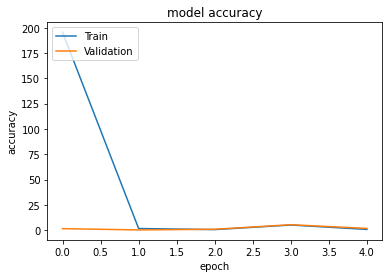

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

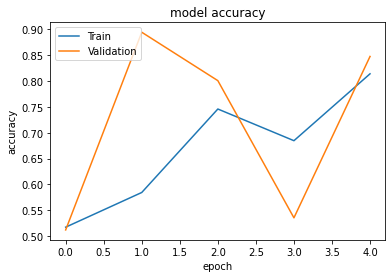

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
history1 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
9/9 [==============================] - 145s 15s/step - loss: 0.3090 - accuracy: 0.8715 - val_loss: 3.8467 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 139s 15s/step - loss: 0.4469 - accuracy: 0.8208 - val_loss: 0.9474 - val_accuracy: 0.7305
Epoch 3/10
9/9 [==============================] - 133s 14s/step - loss: 0.4138 - accuracy: 0.8306 - val_loss: 1.0058 - val_accuracy: 0.7070
Epoch 4/10
9/9 [==============================] - 138s 15s/step - loss: 0.3439 - accuracy: 0.8744 - val_loss: 0.3871 - val_accuracy: 0.8359
Epoch 5/10
9/9 [==============================] - 138s 15s/step - loss: 0.3253 - accuracy: 0.8676 - val_loss: 0.3670 - val_accuracy: 0.8320
Epoch 6/10
9/9 [==============================] - 128s 14s/step - loss: 0.3718 - accuracy: 0.8413 - val_loss: 1.1010 - val_accuracy: 0.7031
Epoch 7/10
9/9 [==============================] - 134s 15s/step - loss: 0.2379 - accuracy: 0.9026 - val_loss: 1.0619 - val_accuracy: 0.7188
Epoch 8/10
9/9 [====

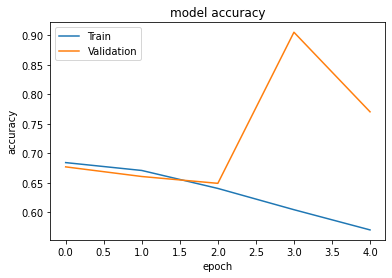

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

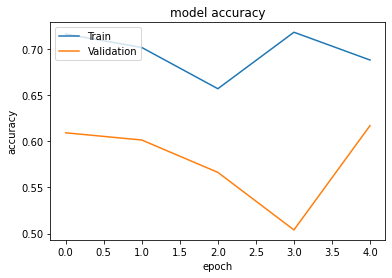

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**CNN Using Augmentor Library**

In [ ]:
# https://github.com/mdbloice/Augmentor/blob/master/notebooks/Augmentor_Keras.ipynb
# Importing Augmentor
import Augmentor

# Creating Pipeline to Augmentor Library
Augmentor_CNN = Augmentor.Pipeline("/content/horse-or-human")

Initialised with 1027 image(s) found.
Output directory set to /content/horse-or-human/output.

In [ ]:
# By applying status function to the Augmentor pipeline we can find how many operations are made to the pipeline
Augmentor_CNN.status()

Operations: 0
Images: 1027
Classes: 2
	Class index: 0 Class label: horses 
	Class index: 1 Class label: humans 
Dimensions: 1
	Width: 300 Height: 300
Formats: 1
	 PNG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [ ]:
# We are performing eight operations to the pipeline

Augmentor_CNN.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
Augmentor_CNN.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
Augmentor_CNN.flip_left_right(probability=0.4)
Augmentor_CNN.flip_top_bottom(probability=0.8)
Augmentor_CNN.rotate90(probability=0.1)
Augmentor_CNN.random_distortion(probability=0.2, grid_height=2, grid_width=2, magnitude=4)
Augmentor_CNN.rotate180(probability=0.4)
Augmentor_CNN.rotate270(probability=0.4)
# Giving samples to generate
Augmentor_CNN.sample(500)
# Finding status of the pipeline how many operations are done to the pipeline
Augmentor_CNN.status() 


Processing <PIL.Image.Image image mode=RGBA size=300x300 at 0x7FB85B622040>: 100%|██████████| 500/500 [00:52<00:00,  9.53 Samples/s]


Operations: 32
	0: RotateRange (probability=0.7 max_left_rotation=-10 max_right_rotation=10 )
	1: Zoom (probability=0.3 min_factor=1.1 max_factor=1.6 )
	2: Flip (probability=0.4 top_bottom_left_right=LEFT_RIGHT )
	3: Flip (probability=0.8 top_bottom_left_right=TOP_BOTTOM )
	4: Rotate 90 (probability=0.1 rotation=90 )
	5: Distort (probability=0.2 grid_width=2 grid_height=2 magnitude=4 randomise_magnitude=True )
	6: Rotate 180 (probability=0.4 rotation=180 )
	7: Rotate 270 (probability=0.4 rotation=270 )
	8: RotateRange (probability=0.7 max_left_rotation=-10 max_right_rotation=10 )
	9: Zoom (probability=0.3 min_factor=1.1 max_factor=1.6 )
	10: Flip (probability=0.4 top_bottom_left_right=LEFT_RIGHT )
	11: Flip (probability=0.8 top_bottom_left_right=TOP_BOTTOM )
	12: Rotate 90 (probability=0.1 rotation=90 )
	13: Distort (probability=0.2 grid_width=2 grid_height=2 magnitude=4 randomise_magnitude=True )
	14: Rotate 180 (probability=0.4 rotation=180 )
	15: Rotate 270 (probability=0.4 rotation